In [1]:
import pandas as pd
import plotly.express as px
import plotly.offline as pyo

In [2]:
# Initialize Plotly's offline mode
pyo.init_notebook_mode(connected=True)

<div style="background-color: lightblue; padding: 10px;">
    <b>Hypothesis:</b> Observed Trend Data indicates that liberal countries (such as those in Western Europe, Canada, and Australia) often see higher immigration rates than more conservative countries. 
<br><br>
    <b>Chart:</b> Economy, Liberalism, and Immigration, a correlation chart or scatter plot:

Economic wealth (e.g., GDP per capita) on the X-axis.  
Liberalism Index on the Y-axis.  
Immigration Rates represented by the size (immigration) or color (emigration) of each country’s data point.  

Liberalism proxy: Civil liberties score, 2005 to 2023. Based on the estimates and scoring by Freedom House (2024). It captures the extent of freedom of expression and association, the rule of law, and personal autonomy. Higher scores indicate more liberties.
</div>

In [3]:
# GDP/cap .csv data downloaded from https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD?most_recent_value_desc=true&view=map&year_high_desc=true
# Liberalism proxy from https://ourworldindata.org/grapher/civil-liberties-score-fh?tab=table
# Total population from https://data.worldbank.org/indicator/SP.POP.TOTL

# Load the data
files = ['GDP.PCAP.PP.xlsx', 'Civil.liberties.xlsx', 'ShareBornAbroad.xlsx', 'ShareEmigrated.xlsx']
dataframes = [pd.read_excel(file) for file in files]

# Print column headings
for i, df in enumerate(dataframes, start=1):
    print(f"Column headings for {files[i-1]}:")
    print(df.columns)
    print("\n")

Column headings for GDP.PCAP.PP.xlsx:
Index(['Country', 'Code', 'Indicator Name', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023'],
      dtype='object')


Column headings for Civil.liberties.xlsx:
Index(['Country', 'Code', 'Civillibertiesscore.2005',
       'Civillibertiesscore.2006', 'Civillibertiesscore.2007',
       'Civillibertiesscore.2008', 'Civillibertiesscore.2009',
       'Civillibertiesscore.2010', 'Civillibertiesscore.2011',
       'Civillibertiesscore.2012', 'Civillibertiesscore.2013',
       'Civillibertiesscore.2014', 'Civillibertiesscore.2015',
       'Civillibertiesscore.2016', 'Civillibertiesscore.2017',
       'Civillibertiesscore.2018', 'Civillibertiesscore.2019',
       'Civillibertiesscore.2020', 'Civillibertiesscore.

In [6]:
# Load the data
df1 = pd.read_excel('GDP.PCAP.PP.xlsx')
df2 = pd.read_excel('Civil.liberties.xlsx')
df3 = pd.read_excel('ShareBornAbroad.xlsx')
df4 = pd.read_excel('ShareEmigrated.xlsx')

# Extract relevant columns (assuming the last column is the latest year)
gdp = df1[['Country', df1.columns[-1]]].rename(columns={df1.columns[-1]: 'gdp_per_capita'})
liberty = df2[['Country', df2.columns[-1]]].rename(columns={df2.columns[-1]: 'liberalism_index'})
immigration = df3[['Country', df3.columns[-1]]].rename(columns={df3.columns[-1]: 'share_born_abroad'})
emigration = df4[['Country', df4.columns[-1]]].rename(columns={df4.columns[-1]: 'share_emigrated'})

# Merge the DataFrames on 'Country'
data = gdp.merge(liberty, on='Country').merge(immigration, on='Country').merge(emigration, on='Country')

# Create the interactive bubble chart with plotly (px)
fig = px.scatter(data, x='liberalism_index', y='gdp_per_capita', size='share_born_abroad', color='share_emigrated',
                 hover_name='Country', size_max=60, color_continuous_scale='viridis_r',
                 labels={'liberalism_index': 'Liberalism Index', 'gdp_per_capita': 'GDP per Capita',
                         'share_born_abroad': 'Born Abroad Rate (%)', 'share_emigrated': 'Share Emigrated (%)'})

# Format hover data to show one decimal place as percentages
fig.update_traces(hovertemplate='<b>%{hovertext}</b><br>' +
                                'Liberalism Index: %{x}<br>' +
                                'GDP per Capita: %{y}<br>' +
                                'Born Abroad Rate: %{marker.size:.1f}%<br>' +
                                'Share Emigrated: %{marker.color:.1f}%')

# Update color bar to show percentages
fig.update_coloraxes(colorbar=dict(tickformat='.0%'))

fig.update_layout(title='Economy, Liberalism, and Migration by Country, 2022',
                  xaxis_title='Liberalism Index',
                  yaxis_title='GDP per Capita')
fig.show()

# Save the figure as an HTML file
fig.write_html("plot.html")

Hover over individual bubbles to see the data by country like the example shows below.

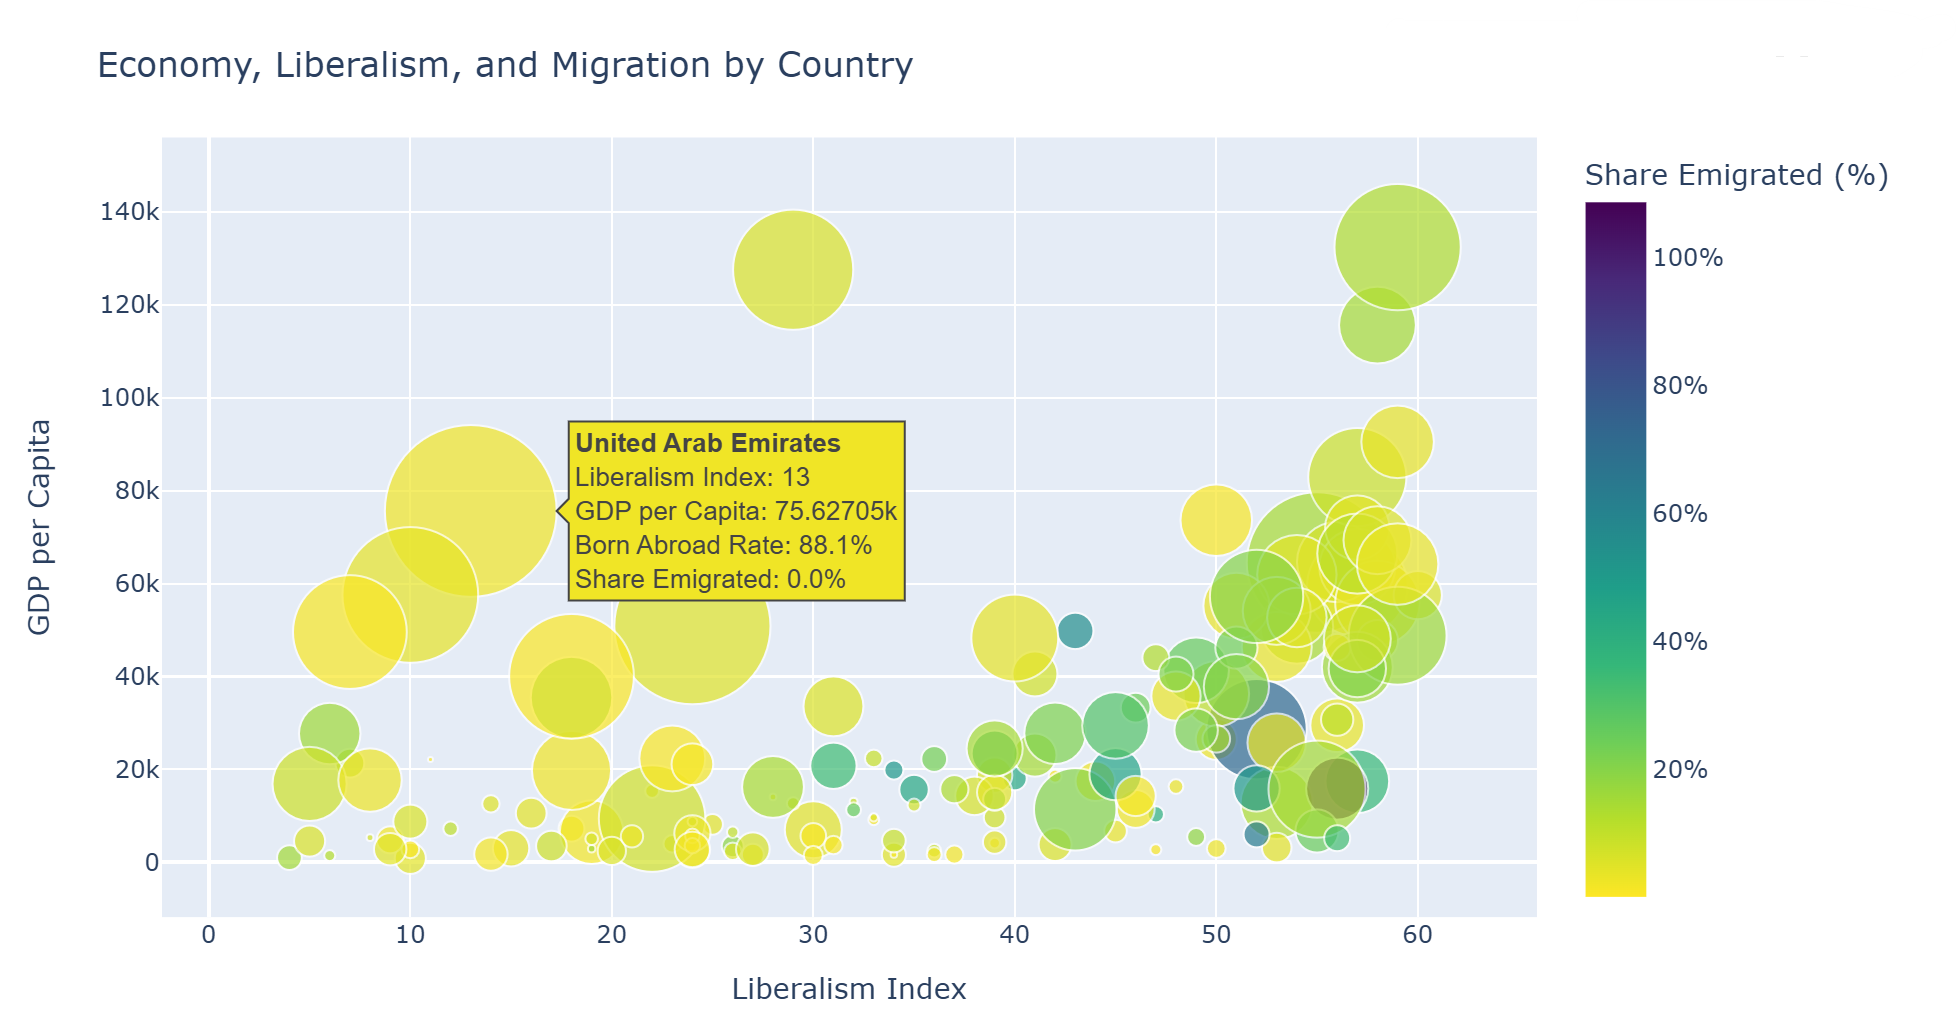

In [5]:
# Sort and select top 10 and bottom 10 countries by immigration share
top_10_immigration = data.nlargest(10, 'share_born_abroad')[['Country', 'share_born_abroad']]
bottom_10_immigration = data.nsmallest(10, 'share_born_abroad')[['Country', 'share_born_abroad']]

# Sort and select top 10 and bottom 10 countries by emigration share
top_10_emigration = data.nlargest(10, 'share_emigrated')[['Country', 'share_emigrated']]
bottom_10_emigration = data.nsmallest(10, 'share_emigrated')[['Country', 'share_emigrated']]

# Print the results
print("Top 10 Countries by Immigration Share:")
print(top_10_immigration)
print("\nBottom 10 Countries by Immigration Share:")
print(bottom_10_immigration)
print("\nTop 10 Countries by Emigration Share:")
print(top_10_emigration)
print("\nBottom 10 Countries by Emigration Share:")
print(bottom_10_emigration)

Top 10 Countries by Immigration Share:
                  Country  share_born_abroad
4    United Arab Emirates          88.129220
130                 Qatar          77.269900
82                 Kuwait          72.827840
86          Liechtenstein          67.852745
93                 Monaco          67.783610
3                 Andorra          58.984016
17                Bahrain          55.013126
90             Luxembourg          47.615562
119                  Oman          46.465862
136             Singapore          43.136753

Bottom 10 Countries by Immigration Share:
              Country  share_born_abroad
36               Cuba           0.026698
30              China           0.072234
95         Madagascar           0.128428
68          Indonesia           0.129972
102           Myanmar           0.140500
66              Haiti           0.165612
87          Sri Lanka           0.187986
123       Philippines           0.205807
92            Morocco           0.277314
125  Papua Ne

Only data on the population share or percentage of immigrants is available online; there is no information on the share of emigrants. The immigration data posted below slightly differ from my calculations:

Top 10 Countries by Immigration Share:
United Arab Emirates: 88.13%
Qatar: 77.27%
Kuwait: 72.83%
Bahrain: 55.01%
Oman: 46.47%
Singapore: 43.14%
Saudi Arabia: 38.65%
Jordan: 33.89%
Australia: 30.14%
Switzerland: 28.79%12

Bottom 10 Countries by Immigration Share:
China: 0.07%
India: 0.35%
Nigeria: 0.63%
Egypt: 0.53%
Brazil: 0.51%
Afghanistan: 0.37%
Bangladesh: 1.28%
Pakistan: 1.48%
Indonesia: 0.13%
Philippines: 0.21%

<b>Analyzing the "Economy, Liberalism, and Migration by Country" Chart</b>  

Liberalism and GDP: There appears to be a positive correlation between liberalism and GDP per capita. Countries with higher liberalism indices tend to have higher GDP per capita. However, there are exceptions, indicating that other factors might influence a country's economic prosperity.  

Immigration and GDP: There seems to be a positive correlation between GDP per capita and immigration rates. Countries with higher GDP per capita tend to attract more immigrants. This is likely due to factors like economic opportunities, better living standards, and political stability in these countries.  

Emigration and Liberalism: There is no clear correlation between liberalism and emigration rates. Countries with high and low liberalism indices can have both high and low emigration rates. This suggests that other factors like economic opportunities, political stability, and cultural factors might influence emigration decisions.